<a href="https://colab.research.google.com/github/happy2704gohil/railway-accidents-time-series-analysis/blob/main/Indian_railway_accident.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series analysis of Indian Railway accidents

[1] Aher, S.B. and Tiwari, D.R., 2018. Trends in Causes and Impacts of Accidents in Indian Railway. J Soc Sci, 55(1-3), pp.34-44.

# Importing the libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf

# Importing the data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Detecting Pneumonia/master-data-year-and-category-wise-consequential-train-accidents-on-indian-railways.csv')

# data exploration

In [ ]:
df.columns

Index(['fiscal_year', 'state', 'category', 'accidents', 'unit', 'note'], dtype='object')

In [ ]:
df.shape

(378, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378 entries, 0 to 377
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   fiscal_year  378 non-null    object 
 1   state        378 non-null    object 
 2   category     378 non-null    object 
 3   accidents    378 non-null    object 
 4   unit         378 non-null    object 
 5   note         0 non-null      float64
dtypes: float64(1), object(5)
memory usage: 17.8+ KB


In [ ]:
df.unit.unique()

array(['accidents in absolute numbers'], dtype=object)

In [ ]:
df.drop(['note','unit','state'], axis = 1,inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378 entries, 0 to 377
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   fiscal_year  378 non-null    object
 1   category     378 non-null    object
 2   accidents    378 non-null    object
dtypes: object(3)
memory usage: 9.0+ KB


In [ ]:
df.head()

,fiscal_year,category,accidents
0,2022-23,Collisions,6
1,2022-23,Derailments,36
2,2022-23,Accidents at level crossings,1
3,2022-23,Fire in trains,4
4,2022-23,Miscellaneous,1


In [ ]:
df.category.unique()

array(['Collisions', 'Derailments', 'Accidents at level crossings',
       'Fire in trains', 'Miscellaneous', 'Total Accidents'], dtype=object)

# Data cleaning and processing

In [ ]:
def to_num(x):
  try:
    return int(x)
  except:
    s = ''.join(x.split(','))
    return int(s)

df.accidents = df.accidents.apply(to_num)

def fiscal_year_to_datetime(fiscal_year):
    start_year, end_year = fiscal_year.split('-')
    return pd.to_datetime(f'{start_year}-04-01')

# Apply the conversion function to the fiscal_year column
df['fiscal_start_date'] = df['fiscal_year'].apply(fiscal_year_to_datetime)

df

,fiscal_year,category,accidents,fiscal_start_date
0,2022-23,Collisions,6,2022-04-01
1,2022-23,Derailments,36,2022-04-01
2,2022-23,Accidents at level crossings,1,2022-04-01
3,2022-23,Fire in trains,4,2022-04-01
4,2022-23,Miscellaneous,1,2022-04-01
...,...,...,...,...
373,1960-61,Derailments,1415,1960-04-01
374,1960-61,Accidents at level crossings,181,1960-04-01
375,1960-61,Fire in trains,405,1960-04-01
376,1960-61,Miscellaneous,0,1960-04-01


# Time series plot: Category wise

In [ ]:
df_collision = df[df['category'] == 'Collisions']
df_derailments = df[df['category']=='Derailments']
df_accidents = df[df['category']=="Accidents at level crossings"]
df_fire = df[df['category']=="Fire in trains"]
df_miss = df[df['category']== "Miscellaneous"]
df_total = df[df['category']== "Total Accidents"]

In [ ]:
df_miss = df_miss[~(df_miss["accidents"]==0)]

In [ ]:
df.category.unique()

array(['Collisions', 'Derailments', 'Accidents at level crossings',
       'Fire in trains', 'Miscellaneous', 'Total Accidents'], dtype=object)

In [ ]:
df_list = [df_collision,df_derailments, df_accidents, df_fire, df_miss, df_total]

In [ ]:
df.category.unique()[0]

'Collisions'

In [ ]:
def time_series_plot(feature):
  fig, ax = plt.subplots(3,2, figsize = (10,8))
  i = 1
  j = 0
  for df1 in df_list:
    plt.subplot(3,2,i)
    sns.lineplot(x = 'fiscal_start_date', y = feature, data = df1)
    plt.title(df.category.unique()[j])
    i += 1;
    j += 1;

  plt.tight_layout()
  plt.show()

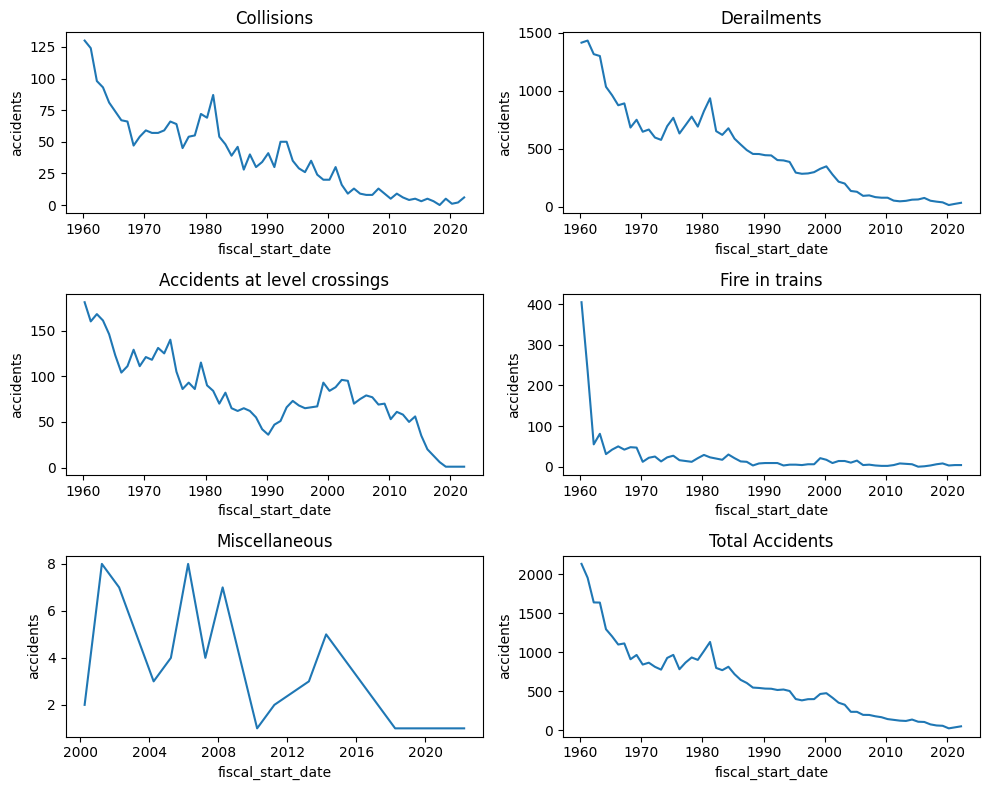

In [ ]:
fig, ax = plt.subplots(3,2, figsize = (10,8))
i = 1
j = 0
for df1 in df_list:
  plt.subplot(3,2,i)
  sns.lineplot(x = 'fiscal_start_date', y = 'accidents', data = df1)
  plt.title(df.category.unique()[j])
  i += 1;
  j += 1;

plt.tight_layout()
plt.show()

## First diff plot

In [ ]:
for df1 in df_list:
  df1["first_diff"] = df1.accidents.diff()
  df1["first_diff"].fillna(0, inplace = True)

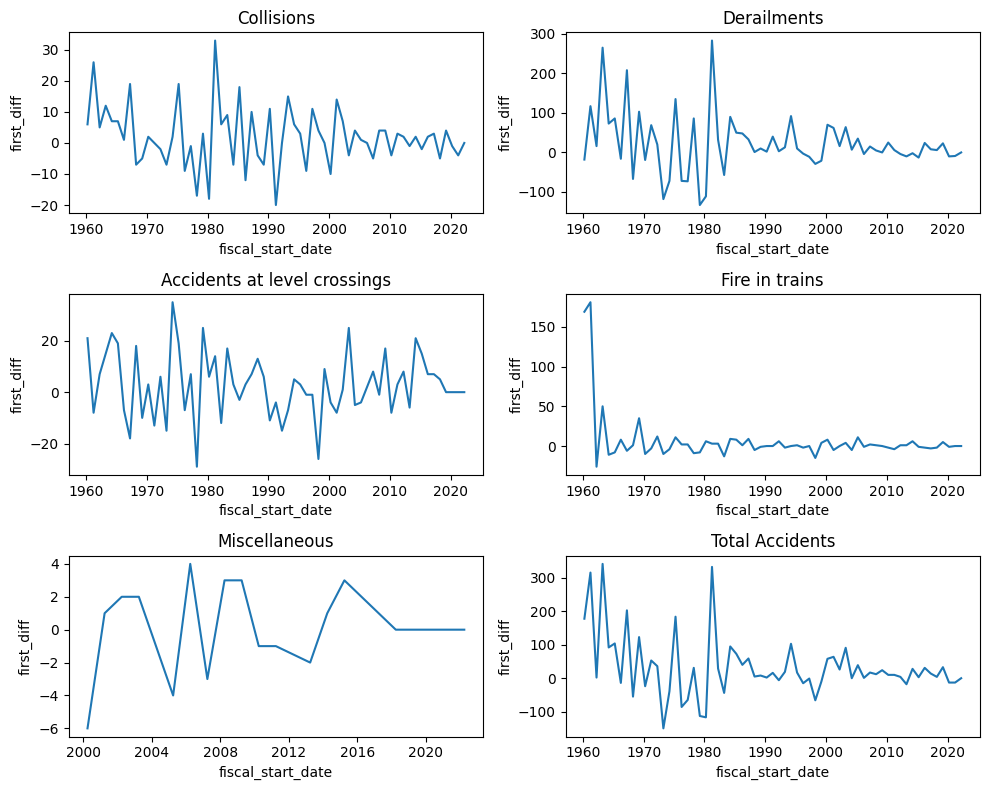

In [ ]:
time_series_plot('first_diff')

## Auto correlation plot 1st diff Vs actual

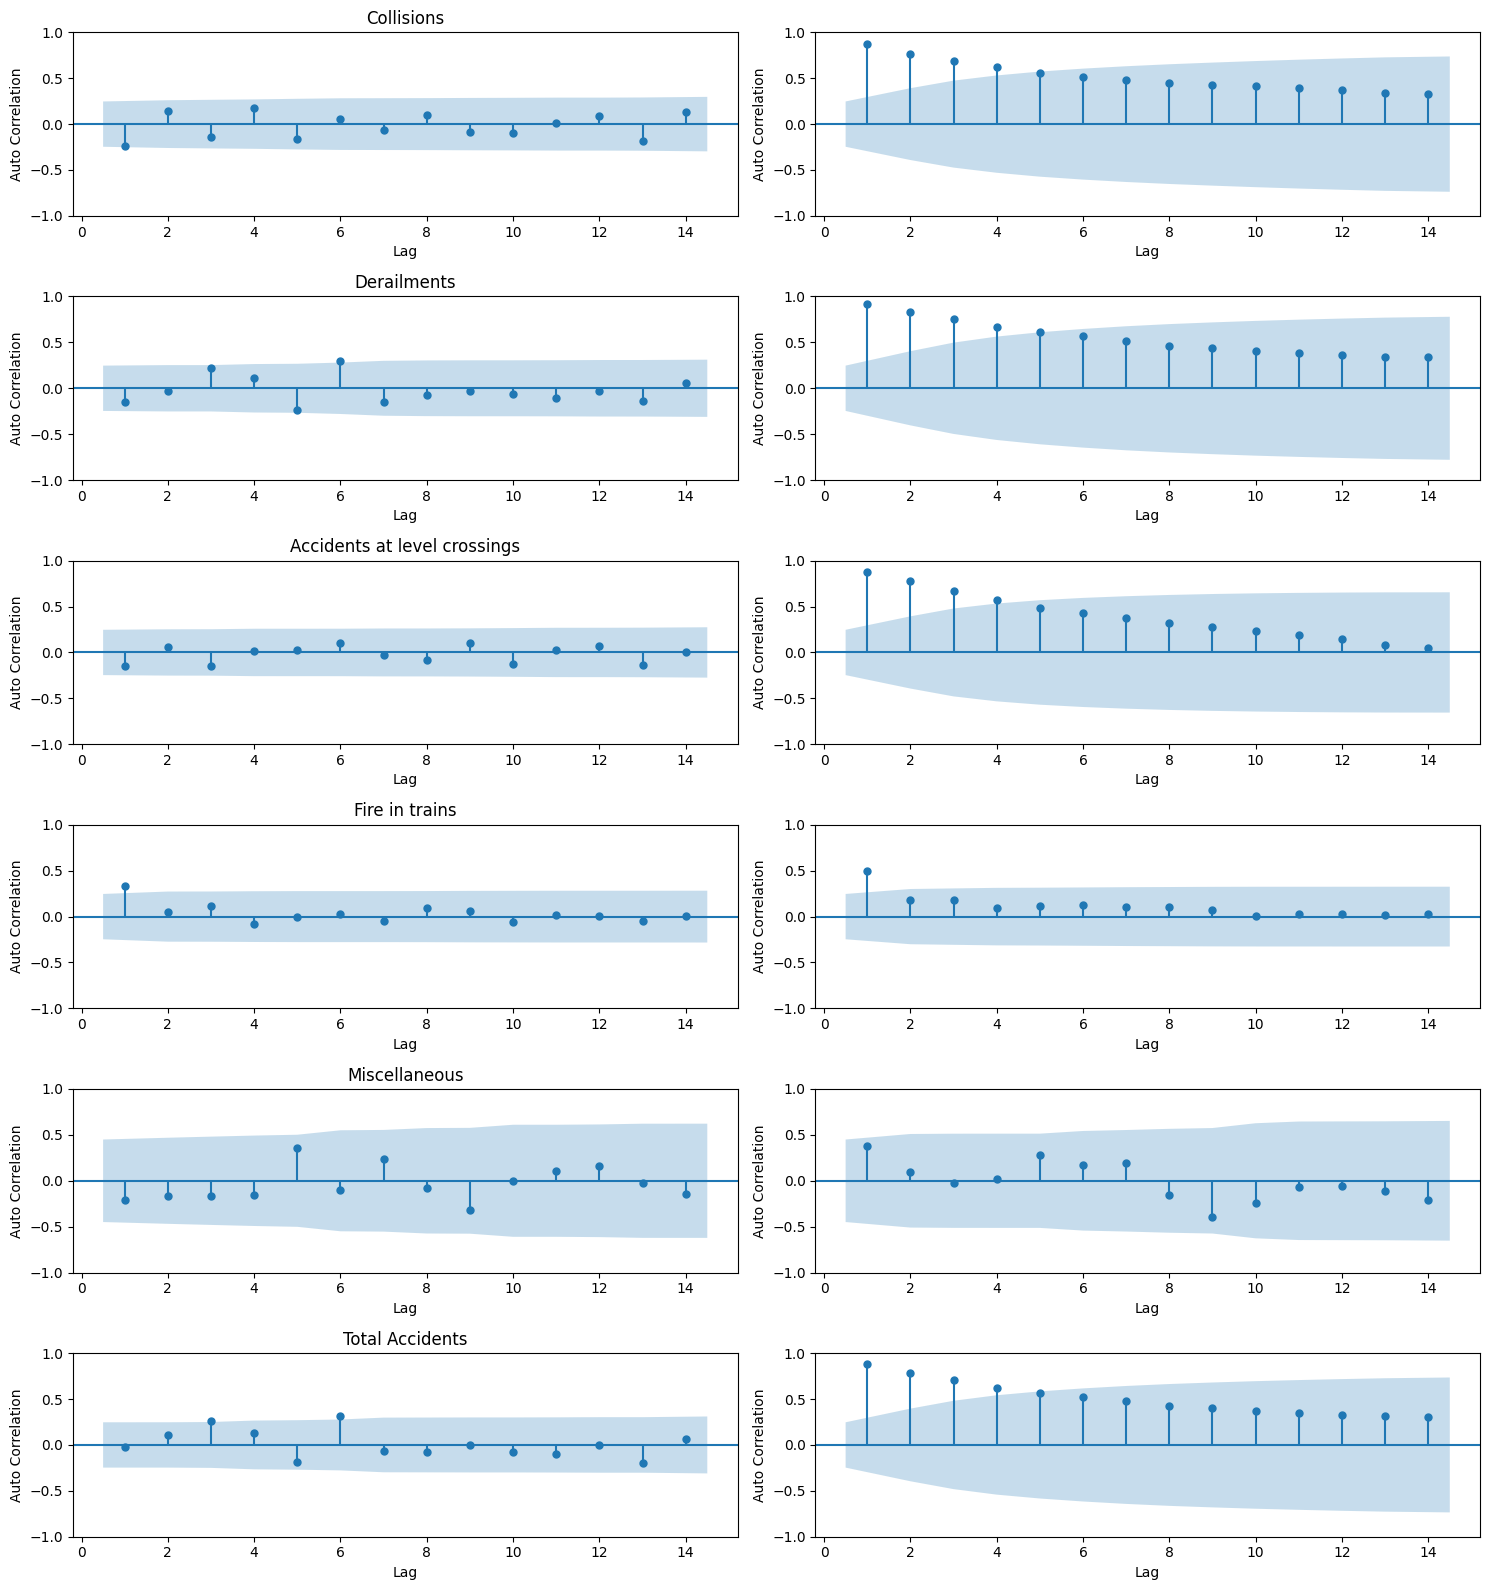

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
def autocorrelation_plots(df, ax, i):

  plot_acf(df["first_diff"], lags=np.arange(1, 15),ax = ax[i][0])
  ax[i][0].set_title(df.category.unique()[0])
  ax[i][0].set_xlabel("Lag")
  ax[i][0].set_ylabel("Auto Correlation")

  plot_acf(df["accidents"], lags=np.arange(1, 15), ax=ax[i][1])
  ax[i][1].set_title(' ')
  ax[i][1].set_xlabel("Lag")
  ax[i][1].set_ylabel("Auto Correlation")

  plt.tight_layout()


fig, ax = plt.subplots(6,2, figsize = (15,16))
i = 0
for df1 in df_list:
  autocorrelation_plots(df1,ax,i)
  i += 1;


## Auto correlation vs partial Autocorrelation

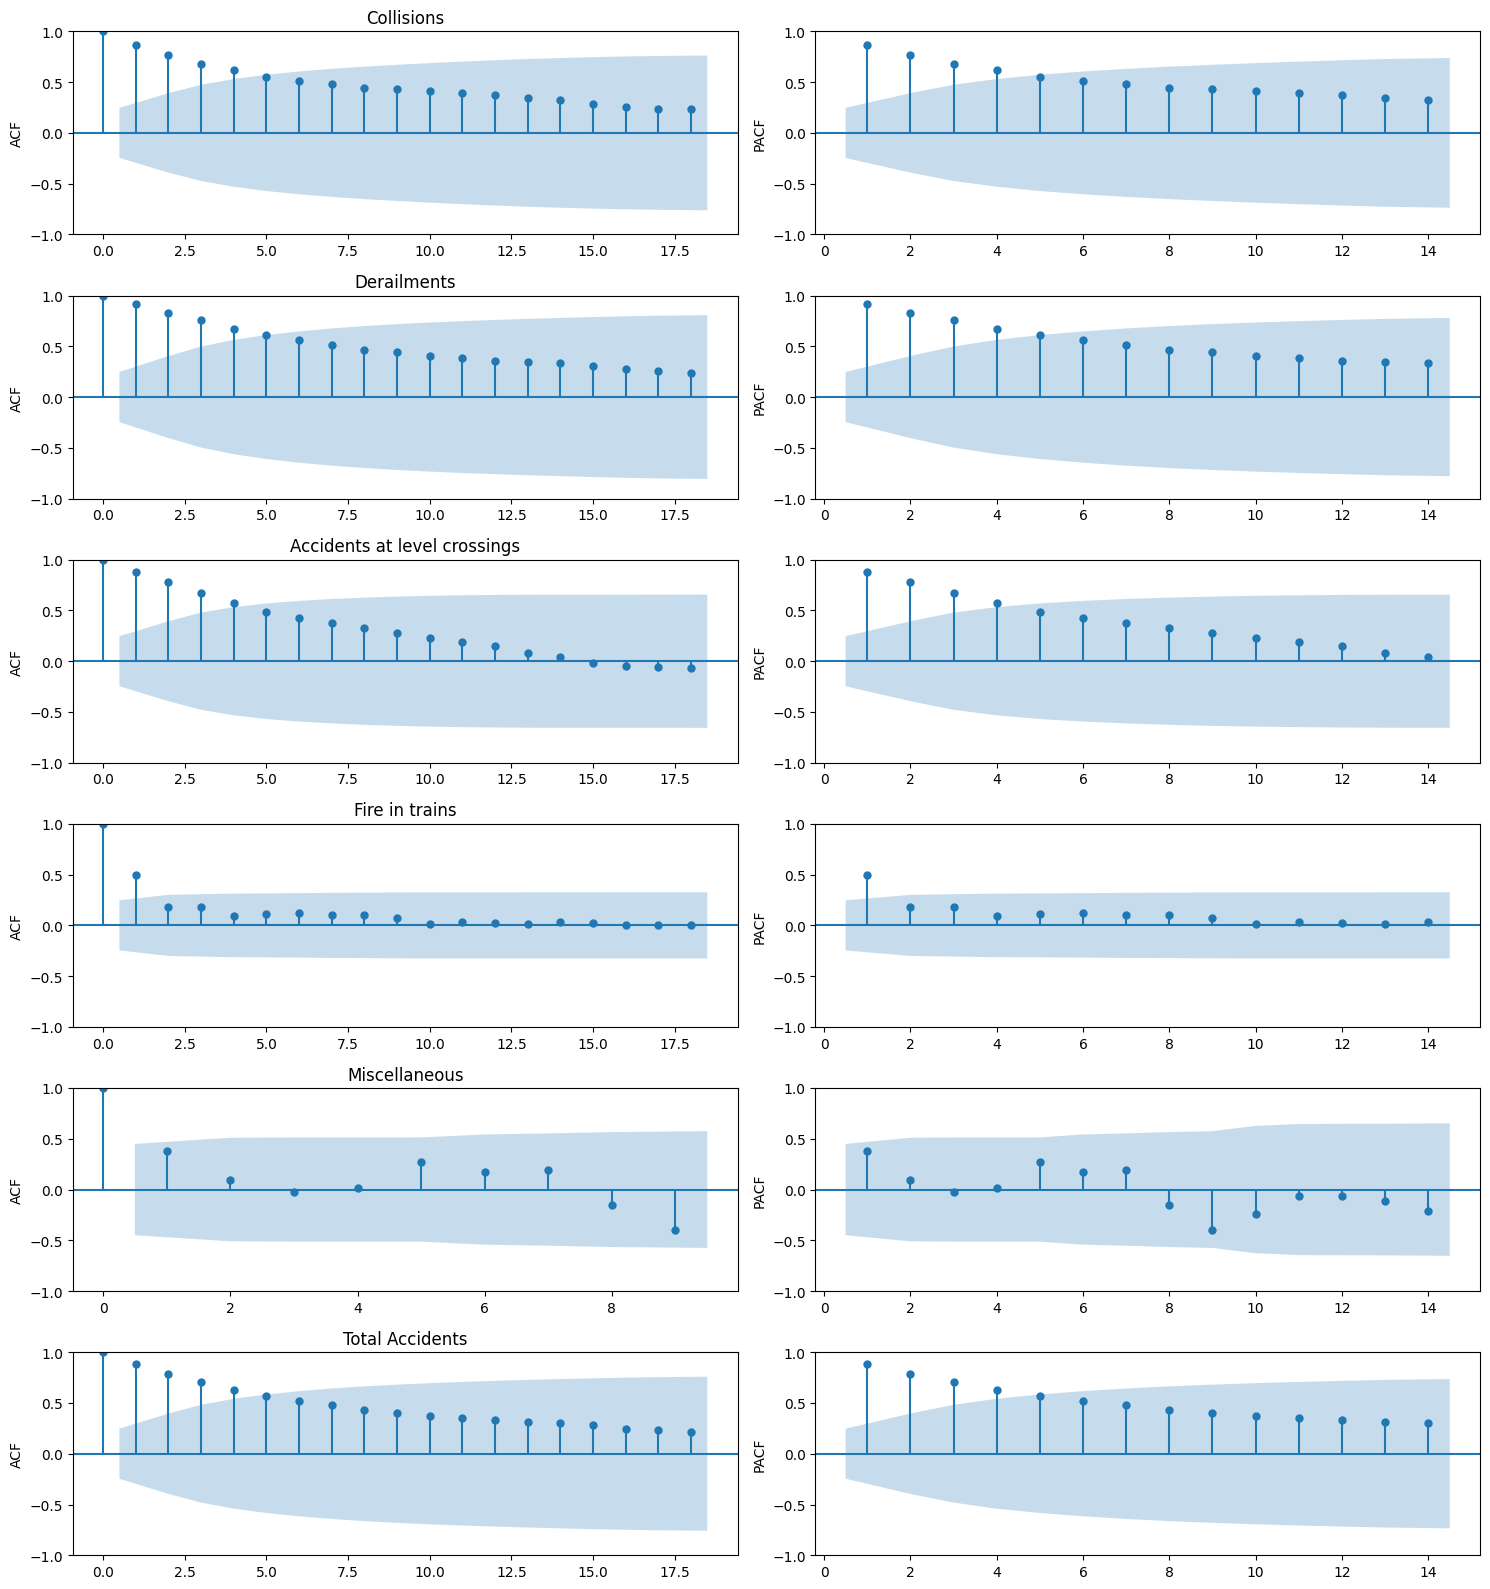

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
def autocorrelation_plots(df, ax, i):

  plot_acf(df["accidents"],ax = ax[i][0])
  ax[i][0].set_title(df.category.unique()[0])
  ax[i][0].set_ylabel("ACF")

  plot_acf(df["accidents"], lags=np.arange(1, 15), ax=ax[i][1])
  ax[i][1].set_title(' ')
  ax[i][1].set_ylabel("PACF")

  plt.tight_layout()


fig, ax = plt.subplots(6,2, figsize = (15,16))
i = 0
for df1 in df_list:
  autocorrelation_plots(df1,ax,i)
  i += 1;

<h2> Observation on plot of ACF and PACF </h2>
<table>
    <thead>
        <tr>
            <th>Category</th>
            <th>ACF</th>
            <th>PACF</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>Collision</td>
            <td>Gradually</td>
            <td>Gradually</td>
        </tr>
        <tr>
            <td>Derailment</td>
            <td>Gradually</td>
            <td>Gradually</td>
        </tr>
        <tr>
            <td>Accidents at level crossing</td>
            <td>instantly</td>
            <td>instanlty</td>
        </tr>
        <tr>
            <td>Fire in train</td>
            <td>Instantly</td>
            <td>Instantly</td>
        </tr>
        <tr>
            <td>Micellaneous</td>
            <td>NA</td>
            <td>NA</td>
        </tr>
        <tr>
            <td>Total Accidents</td>
            <td>Gradually</td>
            <td>Gradually</td>
        </tr>
    </tbody>
</table>

# ADF test functions


1. **adf_test: will return p-value**
2.**adf_test_single: print that series is stationary or not with type-1 error 0.05**


In [ ]:
def adf_test(timeseries):
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    return dfoutput["p-value"]

def adf_test_single(df,timeseries):
  dftest = adfuller(timeseries, autolag="AIC")
  dfoutput = pd.Series(
      dftest[0:4],
      index=[
          "Test Statistic",
          "p-value",
          "#Lags Used",
          "Number of Observations Used",
      ],
  )
  for key, value in dftest[4].items():
      dfoutput["Critical Value (%s)" % key] = value
  p_value = dfoutput["p-value"]
  if p_value > 0.05:
    print(f'{df.category.unique()[0]} is not stationary')
  else:
    print(f'{df.category.unique()[0]} is stationary')

In [ ]:
for df1 in df_list:
  df1["first_diff"] = df1.accidents.diff()
  df1["first_diff"].fillna(0, inplace = True)
  p_value = adf_test(df1['first_diff'])
  if p_value > 0.05:
    print(f'{df1.category.unique()[0]} is not stationary')
  else:
    print(f'{df1.category.unique()[0]} is stationary')

Collisions is stationary
Derailments is not stationary
Accidents at level crossings is stationary
Fire in trains is not stationary
Miscellaneous is not stationary
Total Accidents is not stationary


# Analysis of non staionary categories

## Derailment

ADF test for log transformation
Derailments is not stationary
____________________________________________________________________________________________________
ADF test for sqrt transformation
Derailments is not stationary
______________________________________________________________________________________________________________________________________________________


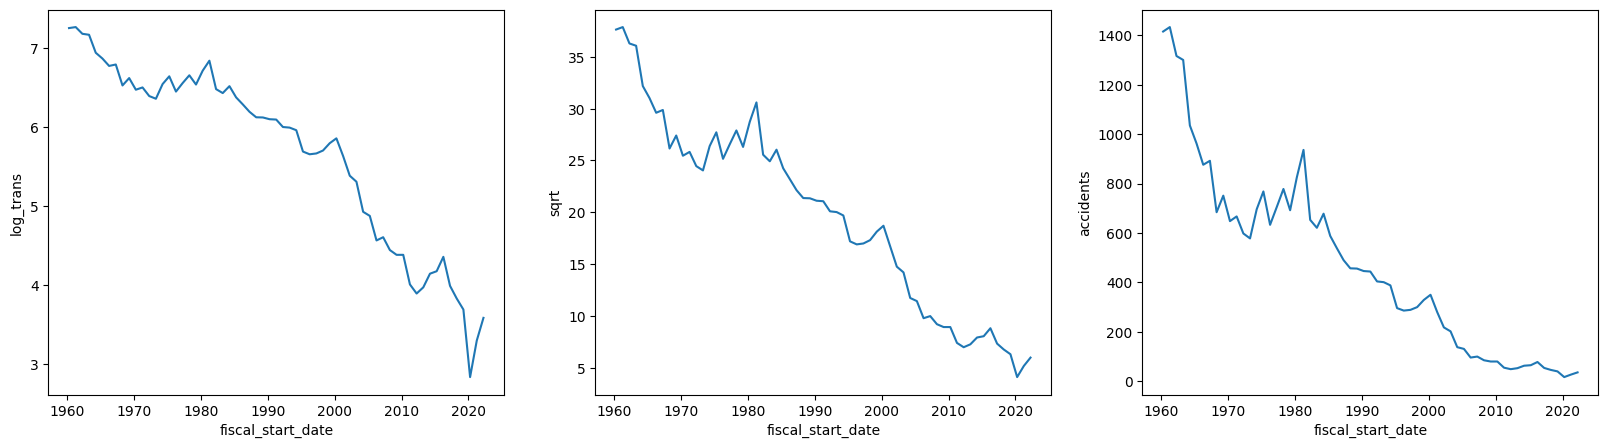

______________________________________________________________________________________________________________________________________________________
ADF test for 2nd diff
Derailments is stationary
______________________________________________________________________________________________________________________________________________________


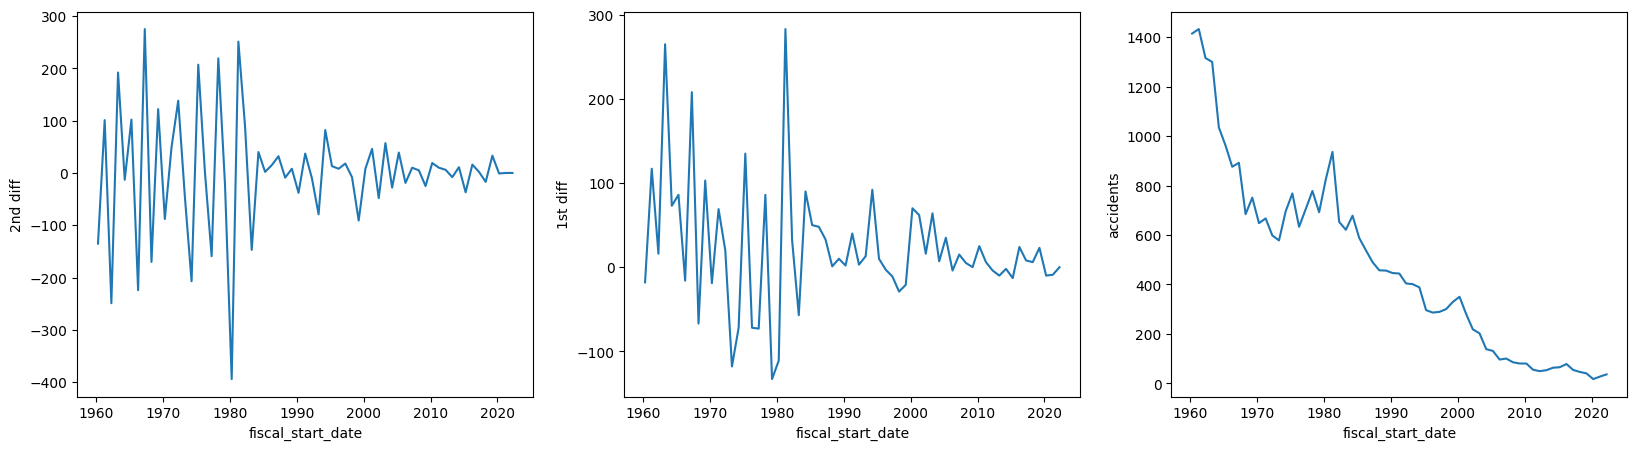

________________________________________________________________________________________________________________________
__________________________________________________Auto Correlation plot__________________________________________________
________________________________________________________________________________________________________________________


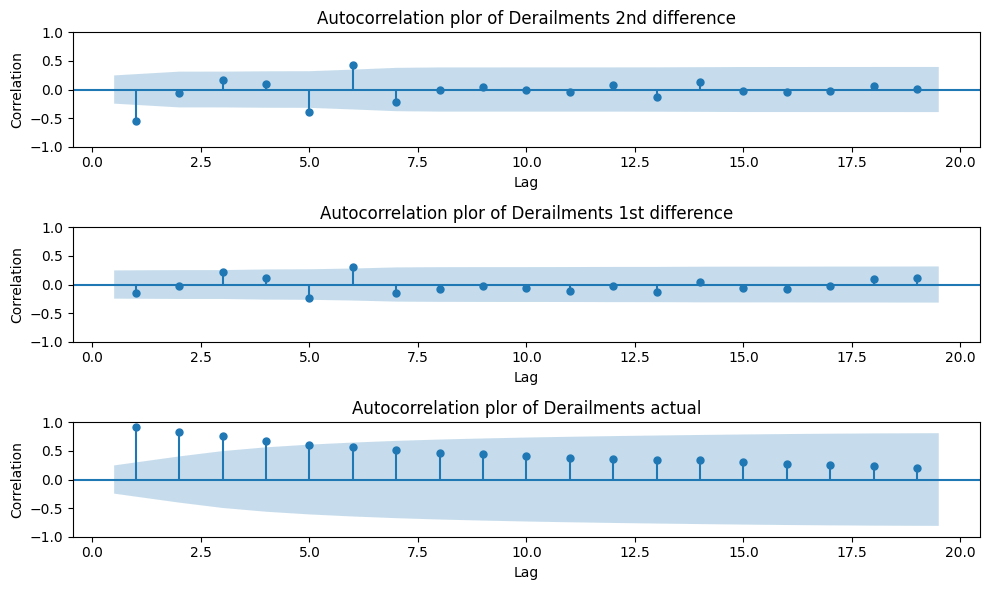

In [ ]:
def analysis_non_stationary(df):
    # Log transformation
    df["log_trans"] = df.accidents.transform(lambda x: np.log(x) if x!=0 else 0)
    # Sqrt transformation
    df["sqrt"] = df.accidents.transform(lambda x: np.sqrt(x))

    print("ADF test for log transformation")
    adf_test_single(df, df["log_trans"])
    print("_" * 100)

    print("ADF test for sqrt transformation")
    adf_test_single(df, df["sqrt"])
    print("_" * 150)

    # Line plots
    fig, ax = plt.subplots(1, 3, figsize=(20, 5))
    plt.subplot(1, 3, 1)
    sns.lineplot(x='fiscal_start_date', y='log_trans', data=df)
    plt.subplot(1, 3, 2)
    sns.lineplot(x='fiscal_start_date', y='sqrt', data=df)
    plt.subplot(1, 3, 3)
    sns.lineplot(x='fiscal_start_date', y='accidents', data=df)
    plt.show()

    # 2nd difference
    df["two_diff"] = df.accidents.diff().diff()
    df["two_diff"].fillna(0, inplace=True)
    print("_" * 150)

    print("ADF test for 2nd diff")
    adf_test_single(df, df["two_diff"])
    print("_" * 150)

    # Line plots of differences
    fig, ax = plt.subplots(1, 3, figsize=(20, 5))
    plt.subplot(1, 3, 1)
    sns.lineplot(x='fiscal_start_date', y='two_diff', data=df)
    plt.ylabel("2nd diff")
    plt.subplot(1, 3, 2)
    sns.lineplot(x='fiscal_start_date', y='first_diff', data=df)
    plt.ylabel("1st diff")
    plt.subplot(1, 3, 3)
    sns.lineplot(x='fiscal_start_date', y='accidents', data=df)
    plt.ylabel("accidents")
    plt.show()

    print("_" * 120)
    print("_" * 50 + "Auto Correlation plot" + "_" * 50)
    print("_" * 120)

    # Autocorrelation plots
    fig, ax = plt.subplots(3, 1, figsize=(10, 6))

    plot_acf(df["two_diff"], lags=np.arange(1, 20), ax=ax[0])
    ax[0].set_title("Autocorrelation plor of "+ df.category.unique()[0]+" 2nd difference")
    ax[0].set_xlabel("Lag")
    ax[0].set_ylabel("Correlation")

    plot_acf(df["first_diff"], lags=np.arange(1, 20), ax=ax[1])
    ax[1].set_title("Autocorrelation plor of "+ df.category.unique()[0]+" 1st difference")
    ax[1].set_xlabel("Lag")
    ax[1].set_ylabel("Correlation")

    plot_acf(df["accidents"], lags=np.arange(1, 20), ax=ax[2])
    ax[2].set_title("Autocorrelation plor of "+ df.category.unique()[0]+" actual")
    ax[2].set_xlabel("Lag")
    ax[2].set_ylabel("Correlation")

    plt.tight_layout()
    plt.show()

analysis_non_stationary(df_derailments)

## Fire in train

ADF test for log transformation
Fire in trains is not stationary
____________________________________________________________________________________________________
ADF test for sqrt transformation
Fire in trains is not stationary
______________________________________________________________________________________________________________________________________________________


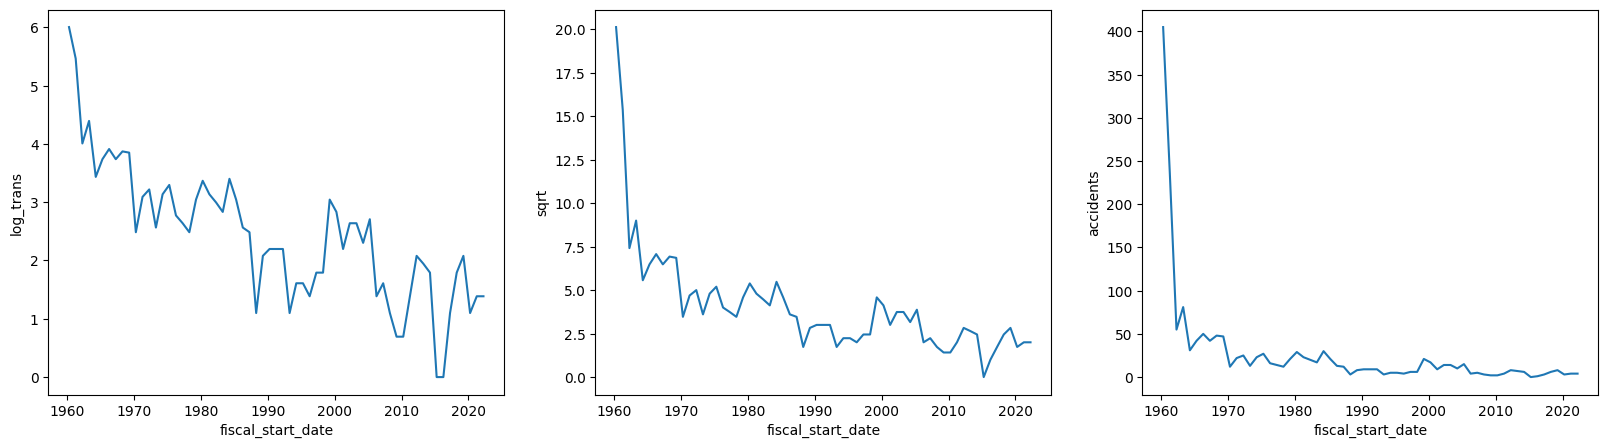

______________________________________________________________________________________________________________________________________________________
ADF test for 2nd diff
Fire in trains is not stationary
______________________________________________________________________________________________________________________________________________________


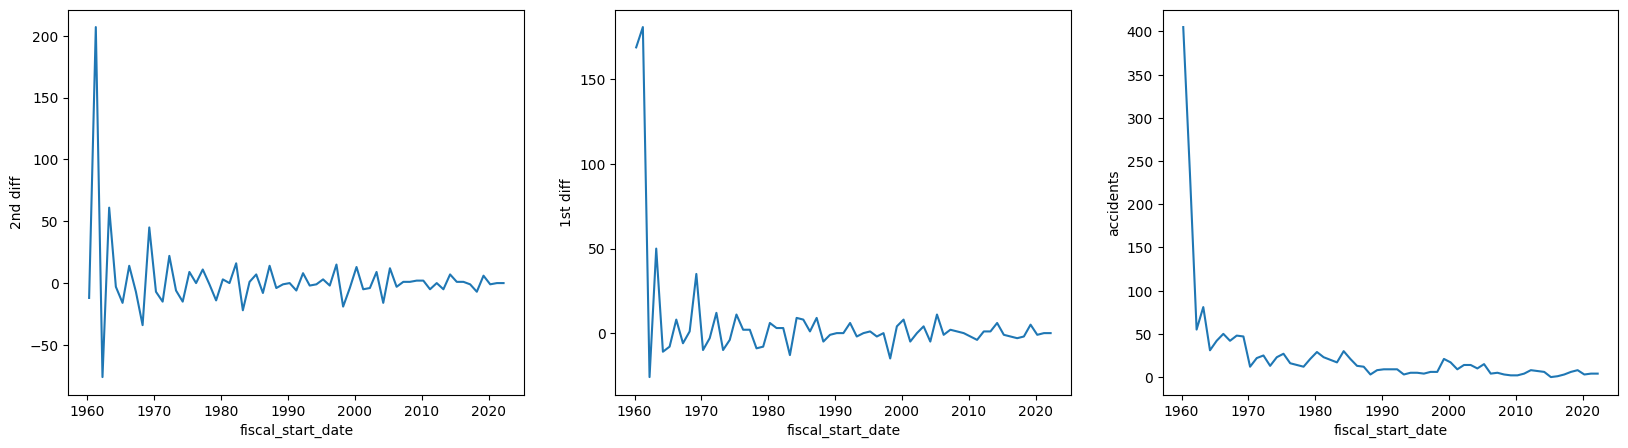

________________________________________________________________________________________________________________________
__________________________________________________Auto Correlation plot__________________________________________________
________________________________________________________________________________________________________________________


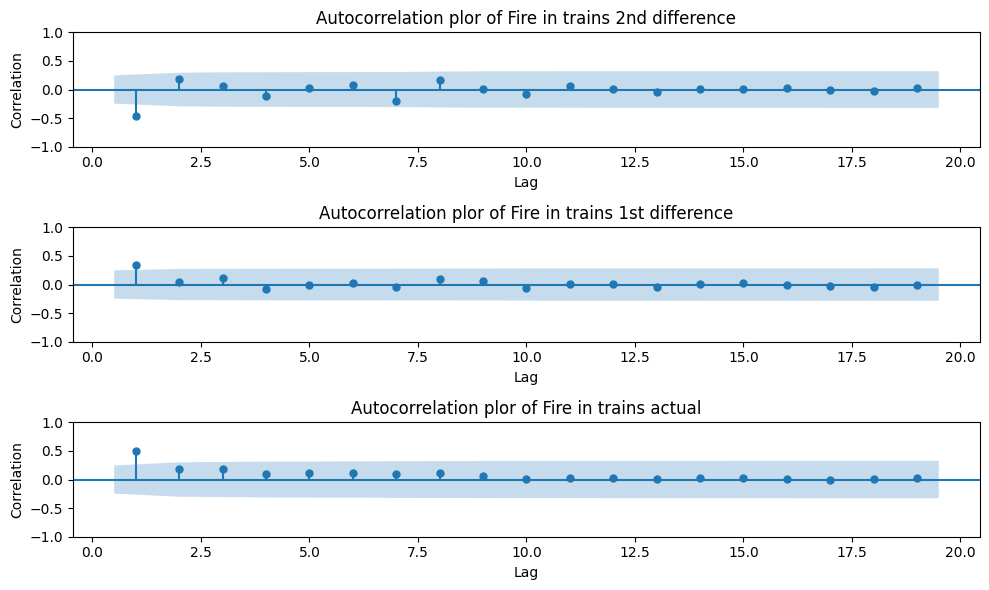

In [ ]:
analysis_non_stationary(df_fire)

In [ ]:
for df1 in df_list:
  print(df1.columns)

Index(['fiscal_year', 'category', 'accidents', 'fiscal_start_date',
       'first_diff'],
      dtype='object')
Index(['fiscal_year', 'category', 'accidents', 'fiscal_start_date',
       'first_diff', 'log_trans', 'sqrt', 'two_diff'],
      dtype='object')
Index(['fiscal_year', 'category', 'accidents', 'fiscal_start_date',
       'first_diff'],
      dtype='object')
Index(['fiscal_year', 'category', 'accidents', 'fiscal_start_date',
       'first_diff', 'log_trans', 'sqrt', 'two_diff'],
      dtype='object')
Index(['fiscal_year', 'category', 'accidents', 'fiscal_start_date',
       'first_diff'],
      dtype='object')
Index(['fiscal_year', 'category', 'accidents', 'fiscal_start_date',
       'first_diff'],
      dtype='object')


In [ ]:
df_derailments

,fiscal_year,category,accidents,fiscal_start_date,first_diff,log_trans,sqrt,two_diff
1,2022-23,Derailments,36,2022-04-01,0.0,3.583519,6.000000,0.0
7,2021-22,Derailments,27,2021-04-01,-9.0,3.295837,5.196152,0.0
13,2020-21,Derailments,17,2020-04-01,-10.0,2.833213,4.123106,-1.0
19,2019-20,Derailments,40,2019-04-01,23.0,3.688879,6.324555,33.0
25,2018-19,Derailments,46,2018-04-01,6.0,3.828641,6.782330,-17.0
...,...,...,...,...,...,...,...,...
349,1964-65,Derailments,1035,1964-04-01,73.0,6.942157,32.171416,-13.0
355,1963-64,Derailments,1300,1963-04-01,265.0,7.170120,36.055513,192.0
361,1962-63,Derailments,1316,1962-04-01,16.0,7.182352,36.276714,-249.0
367,1961-62,Derailments,1433,1961-04-01,117.0,7.267525,37.854986,101.0


In [ ]:
df_derailments.first_diff.describe()

count     63.000000
mean      21.888889
std       74.445501
min     -133.000000
25%      -10.000000
50%        8.000000
75%       49.000000
max      283.000000
Name: first_diff, dtype: float64

In [ ]:
df_derailments.first_diff.var()

5542.1326164874545

In [ ]:
list_var = []
for i in range(df_derailments.first_diff.shape[0]):
  list_var.append(df_derailments.first_diff[:i].var())

<Axes: ylabel='first_diff'>

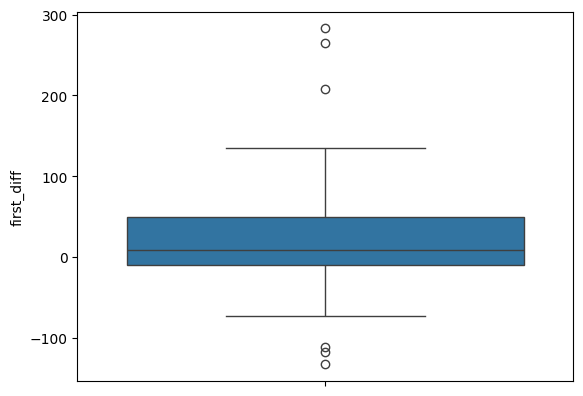

In [ ]:
sns.boxplot(df_derailments.first_diff)

Text(0.5, 1.0, 'variance till date vs date')

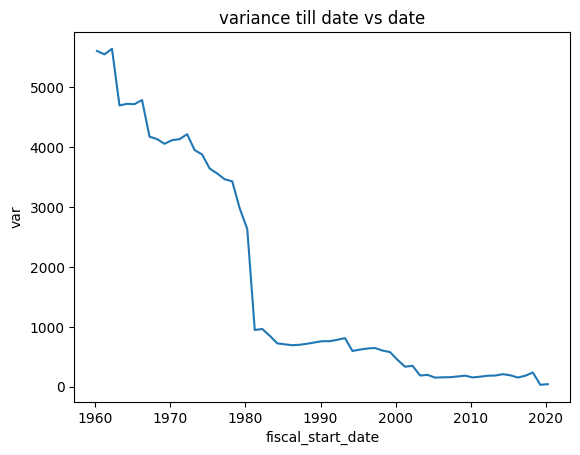

In [ ]:
sns.lineplot(x = 'fiscal_start_date', y = 'var', data = df_derailments)
plt.title('variance till date vs date')